## SoCalSolutions

# Predicting Pet Adoption Likelihood
### Authors: Ben Denis, Mohe Dean Hajjar, Rahim Sarpas, Sandor Faya

## Introduction
Animal shelters across the globe face a significant challenge in ensuring that the pets they care for find permanent, loving homes. Despite the efforts of shelter staff and volunteers, many pets remain unadopted for extended periods, which can lead to overcrowding and strain on shelter resources. This situation not only affects the well-being of the animals but also the operational efficiency of the shelters. Understanding and predicting the factors that influence pet adoption can greatly enhance the adoption process, ensuring that more pets find their forever homes faster.

The problem we aim to solve is to develop a predictive model that assesses the likelihood of pets getting adopted from shelters. By analyzing various attributes of the pets, such as species, age, sex, color, and health status, we can identify patterns and factors that significantly impact adoption rates. This model will help shelters optimize their resources and strategies by highlighting which pets are less likely to be adopted and may need additional support or visibility. Furthermore, it can assist in tailoring adoption campaigns, improving matchmaking between pets and potential adopters, and ultimately increasing the adoption rates.

Description of the Source Data Set and Prediction Goal

## Source Data Set
We will use the "Animal Shelter Intakes and Outcomes" dataset, which comprises detailed records of approximately 27,000 animals that have passed through a shelter system. Each entry in the dataset represents an individual animal, providing comprehensive information about its journey through the shelter. The dataset includes information about each animal’s species, DOB, sex, color, health status, intake date, and outcome.

[Link to the dataset](https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/export/?flg=en-us&disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead)

## Prediction Goal
We aim to build a system to predict the likelihood of a pet being adopted from the shelter. The target variable will be `Outcome Type`, where we will focus on outcomes indicating adoption. The predictors we plan to use include species, age, sex, color, health status, and intake conditions.

Preliminary Work on Data Preparation

Data Preparation
The initial steps for data preparation include:

Loading the dataset
Handling missing values
Encoding categorical variables
Creating new features if necessary (e.g., age at intake)

## Data Preparation
The initial steps for data preparation include:

    1. Loading the dataset
    2. Handling missing values
    3. Encoding categorical variables
    4. Creating new features if necessary (e.g., age at intake)

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.longbeach.gov/api/explore/v2.1/catalog/datasets/animal-shelter-intakes-and-outcomes/exports/csv?lang=en&timezone=America%2FLos_Angeles&use_labels=true&delimiter=%2C"
df = pd.read_csv(url)

# Handle missing values by filling with the most frequent value
df.fillna(df.mode().iloc[0], inplace=True)

# Keep a copy of the original DataFrame for visualization
df_viz = df.copy()

# Encode categorical variables using OrdinalEncoder
categorical_features = ['Animal Type', 'Sex', 'Primary Color', 'Secondary Color', 'Intake Condition', 'Intake Type', 'Outcome Type']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_features] = encoder.fit_transform(df[categorical_features].astype(str))

# Create new features
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Intake Date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['Age at Intake'] = (df['Intake Date'] - df['DOB']).dt.days / 365.25

Preliminary Work on Data Exploration and Visualization

## Data Exploration and Visualization
Some initial data exploration to understand the dataset better:

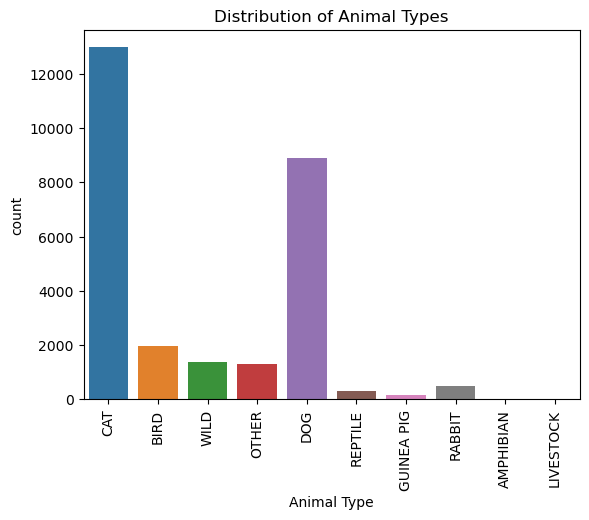

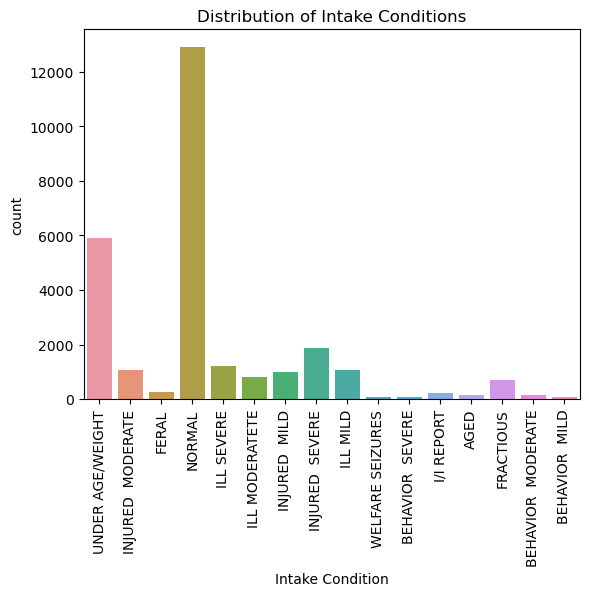

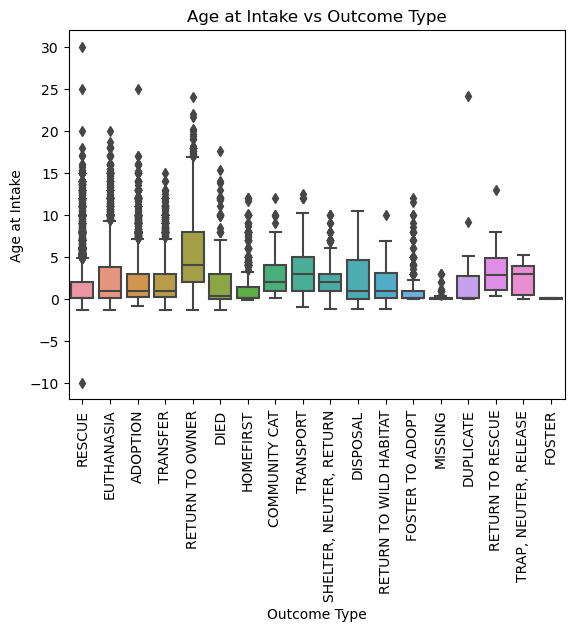

In [12]:
# Fill missing Age at Intake values with the mean age
df['Age at Intake'].fillna(df['Age at Intake'].mean(), inplace=True)

# Create new features for the visualization DataFrame
df_viz['DOB'] = pd.to_datetime(df_viz['DOB'], errors='coerce')
df_viz['Intake Date'] = pd.to_datetime(df_viz['Intake Date'], errors='coerce')
df_viz['Age at Intake'] = (df_viz['Intake Date'] - df_viz['DOB']).dt.days / 365.25
df_viz['Age at Intake'].fillna(df_viz['Age at Intake'].mean(), inplace=True)

# Distribution of animal types
sns.countplot(data=df_viz, x='Animal Type')
plt.title('Distribution of Animal Types')
plt.xticks(rotation=90)
plt.show()

# Distribution of intake conditions
sns.countplot(data=df_viz, x='Intake Condition')
plt.title('Distribution of Intake Conditions')
plt.xticks(rotation=90)
plt.show()

# Relationship between age at intake and outcome type
sns.boxplot(data=df_viz, x='Outcome Type', y='Age at Intake')
plt.title('Age at Intake vs Outcome Type')
plt.xticks(rotation=90)
plt.show()

Preliminary Work on Machine Learning

## Preliminary Work on Machine Learning
We will split the data into training and testing sets and build an initial model to predict the adoption likelihood.

Accuracy: 0.2859221535103674


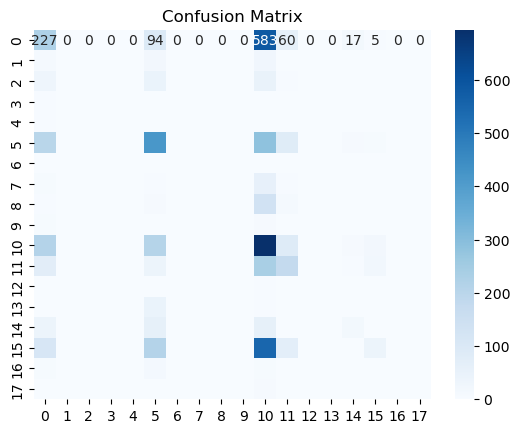

In [15]:
# Define features and target
features = ['Animal Type', 'Sex', 'Primary Color', 'Secondary Color', 'Intake Condition', 'Intake Type', 'Age at Intake']
target = 'Outcome Type'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model on the scaled data
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
